**시계열 자료.**

<br>

#### Todo List (큰 주제로 보면)

<br>

- 연도별 추세 확인? 시각화로. --> X001-2 에서 진행해봄.
- 연도별 자살률 확인?
    - 이 자살률을 국가/나이/세대/성별 로 구분해서 시각화.
        - **연도별 국가** 확인
        - **나이, 세대** 확인
        - **성별** 확인
- X001-3 에서 시각화 후 확인은 완료.

<br>

## Todo List

- 시각화도 마쳤으니  

<br>

1. 간단한 회귀분석
2. PCA
3. Time Series로 접근해서 시각화.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
# data loading
df = pd.read_csv('UseData/fixed_suicide_4(variable del).csv')

In [3]:
df.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,0,Germany,1990,male,75+ years,1516,1717700,0.801,"1,764,967,948,917",23546,G.I. Generation
1,1,Germany,1990,male,55-74 years,2406,6593100,0.801,"1,764,967,948,917",23546,G.I. Generation
2,2,Germany,1990,male,35-54 years,3302,11127100,0.801,"1,764,967,948,917",23546,Silent
3,3,Germany,1990,female,75+ years,1174,3978800,0.801,"1,764,967,948,917",23546,G.I. Generation
4,4,Germany,1990,male,25-34 years,1488,6721200,0.801,"1,764,967,948,917",23546,Boomers


In [4]:
# Unnamed는 도대체 왜 붙어서 오는걸까
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,0.801,"1,764,967,948,917",23546,Boomers


In [6]:
df['gdp_for_year_($)'].describe() # 왜 오브젝트 타입이지 흠..

count                  1056
unique                   88
top       4,887,519,660,745
freq                     12
Name: gdp_for_year_($), dtype: object

In [7]:
# df['gdp_for_year_($)'] = df['gdp_for_year_($)'].astype('float') # 단순히 이러면 error. ','를 제거해야 한다.
# df.head()
# https://pbpython.com/currency-cleanup.html
df['gdp_for_year_($)'] = df['gdp_for_year_($)'].str.replace(',', '')
df['gdp_for_year_($)'] = df['gdp_for_year_($)'].astype('float')
df['gdp_for_year_($)'].describe()

count    1.056000e+03
mean     2.576022e+12
std      1.728380e+12
min      1.002731e+11
25%      9.771480e+11
50%      2.373445e+12
75%      4.053161e+12
max      6.203213e+12
Name: gdp_for_year_($), dtype: float64

In [8]:
# heatmap을 다시 그려보자.
df.corr() # year가 왜 잡히지 ㅋㅋ;
"""
print(df['year'].describe())
df['year'] = pd.to_datetime(df['year'], format='%Y') # 
print(df['year'].describe())
# df['year'] = df['year'].year
df['year'] = pd.DatetimeIndex(df['year']).year
print(df['year'].describe())
"""
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# https://stackoverflow.com/questions/55243221/how-to-convert-a-float-column-to-datetime-with-only-year-and-month-in-python
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['year'], format='%Y')).year
print(df['year'].describe())
df.head()

count    1056.000000
mean     2000.738636
std         8.622898
min      1985.000000
25%      1993.750000
50%      2001.000000
75%      2008.000000
max      2015.000000
Name: year, dtype: float64


,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,0.801,1.764968e+12,23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,0.801,1.764968e+12,23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,0.801,1.764968e+12,23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,0.801,1.764968e+12,23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,0.801,1.764968e+12,23546,Boomers


됐...다....

In [9]:
continuousVars = ['suicides_no', 'population', 'HDI_for_year', 'gdp_for_year_($)', 'gdp_per_capita_($)']
df[continuousVars].corr()

,suicides_no,population,HDI_for_year,gdp_for_year_($),gdp_per_capita_($)
suicides_no,1.000000,0.696447,0.151740,0.360757,0.268703
population,0.696447,1.000000,0.200411,0.547385,0.430052
HDI_for_year,0.151740,0.200411,1.000000,0.551181,0.798088
gdp_for_year_($),0.360757,0.547385,0.551181,1.000000,0.909091
gdp_per_capita_($),0.268703,0.430052,0.798088,0.909091,1.000000


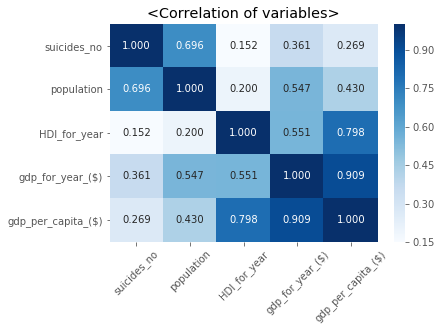

In [10]:
heatMap = sns.heatmap(data=df[continuousVars].corr(), annot = True, fmt='.3f', cmap='Blues')
heatMap.set_xticklabels(heatMap.get_xticklabels(), rotation=45)
plt.title('<Correlation of variables>')
plt.show()

**gdp 둘 중 하나 지우는게 나을듯.**  <br>
**target인 suicides_no랑 더 상관높은 for_year를 남기자.**

In [11]:
df.drop('gdp_per_capita_($)', axis=1, inplace=True)

In [12]:
print(df.head())
df.columns

   country  year     sex          age  suicides_no  population  HDI_for_year  \
0  Germany  1990    male    75+ years         1516     1717700         0.801   
1  Germany  1990    male  55-74 years         2406     6593100         0.801   
2  Germany  1990    male  35-54 years         3302    11127100         0.801   
3  Germany  1990  female    75+ years         1174     3978800         0.801   
4  Germany  1990    male  25-34 years         1488     6721200         0.801   

   gdp_for_year_($)       generation  
0      1.764968e+12  G.I. Generation  
1      1.764968e+12  G.I. Generation  
2      1.764968e+12           Silent  
3      1.764968e+12  G.I. Generation  
4      1.764968e+12          Boomers  


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'HDI_for_year', 'gdp_for_year_($)', 'generation'],
      dtype='object')

훨씬 더 깔끔해진것 같다. 변수도 줄고...

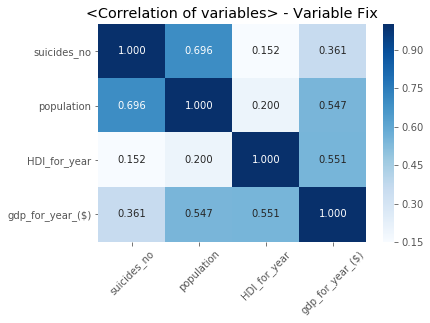

In [13]:
contVars = ['suicides_no', 'population', 'HDI_for_year', 'gdp_for_year_($)']
heatMap2 = sns.heatmap(data=df[contVars].corr(), annot=True, fmt='.3f', cmap='Blues')
heatMap2.set_xticklabels(heatMap2.get_xticklabels(), rotation=45)
plt.title('<Correlation of variables> - Variable Fix')
plt.show()

**population - gdp_for_year // gdp_for_year - HDI_for_year**  <br>
***이렇게들 서로 상관관계가 좀 높아보이긴 하는데***

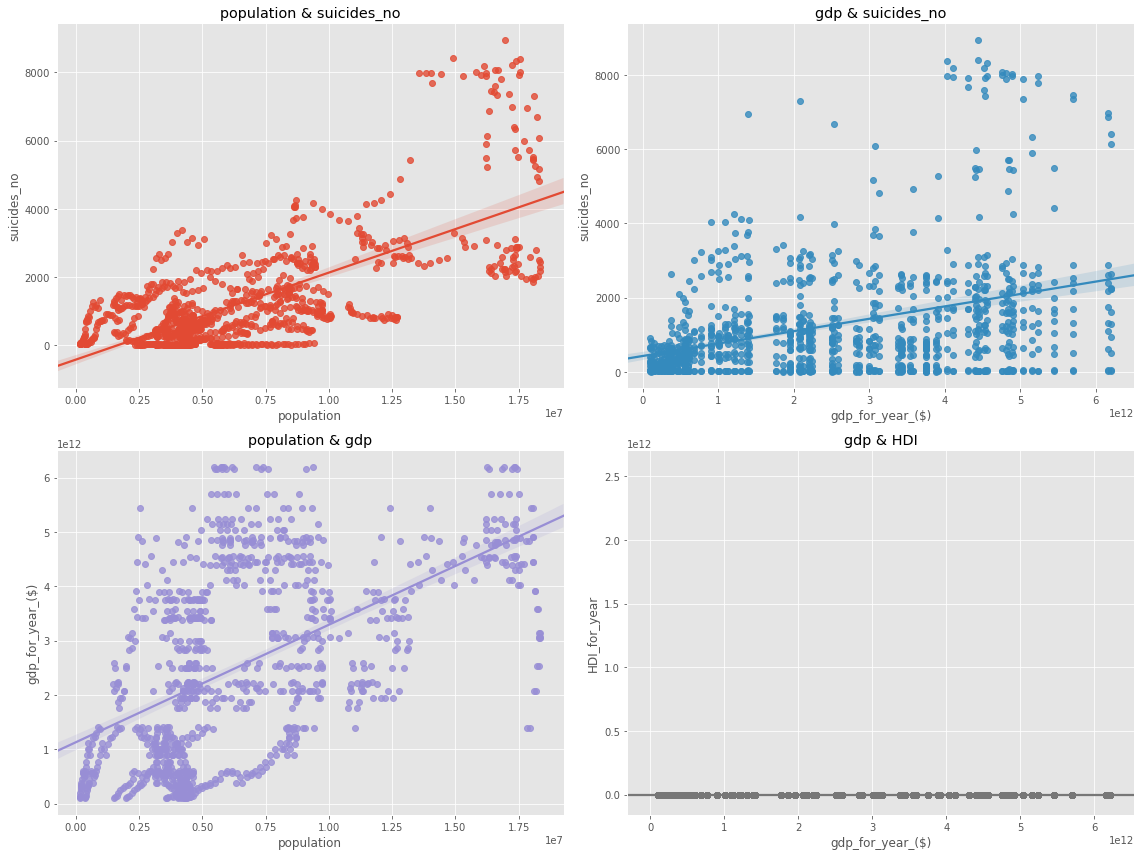

In [14]:
# scatter plot 찍어보자.
# 확인하고 싶은거?
# (suicides, population), (suicides, gdp), (population, gdp), (HDI, gdp)
fig, axes = plt.subplots(2,2, constrained_layout=True, figsize=(16, 12)) # resizing.
ax1 = sns.regplot(x='population', y='suicides_no', data=df, ax=axes[0,0])
ax1.set_title('population & suicides_no')
ax2 = sns.regplot(x='gdp_for_year_($)', y='suicides_no', data=df, ax=axes[0,1])
ax2.set_title('gdp & suicides_no')
ax3 = sns.regplot(x='population', y='gdp_for_year_($)', data=df, ax=axes[1,0])
ax3.set_title('population & gdp')
ax4 = sns.regplot(x='gdp_for_year_($)', y='HDI_for_year', data=df, ax=axes[1,1])
ax4.set_title('gdp & HDI')

fig.tight_layout() # 그래프끼리 안겹치게.
plt.show()

????????  <br>

gdp_for_year 수치가 너무 커서 그런가????

In [15]:
# 속성들 스케일링 해보자.
from sklearn import preprocessing
import statsmodels.api as sm

X_data = df[['population', 'HDI_for_year', 'gdp_for_year_($)']]
scaler = preprocessing.StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)
target = df[['suicides_no']]
targetScaler = preprocessing.StandardScaler().fit(target)
target_scaled = targetScaler.transform(target)

print(X_scaled)
print(target)

[[-1.13625415 -0.85476945 -0.4694793 ]
 [-0.02133755 -0.85476945 -0.4694793 ]
 [ 1.01550698 -0.85476945 -0.4694793 ]
 ...
 [-0.79459581  0.9996636  -0.69071832]
 [-0.95187877  0.9996636  -0.69071832]
 [-0.99224641  0.9996636  -0.69071832]]
      suicides_no
0            1516
1            2406
2            3302
3            1174
4            1488
...           ...
1051         1372
1052          421
1053          256
1054           17
1055           14

[1056 rows x 1 columns]


In [16]:
linearModel = sm.OLS(target_scaled, X_scaled)
result = linearModel.fit()
print('non-fitted linear model 회귀계수 : ', result.params)
result.summary()

non-fitted linear model 회귀계수 :  [ 0.71776334  0.03677784 -0.05240715]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.487
Model:                            OLS   Adj. R-squared (uncentered):              0.485
Method:                 Least Squares   F-statistic:                              332.6
Date:                Sun, 18 Jul 2021   Prob (F-statistic):                   6.77e-152
Time:                        22:20:58   Log-Likelihood:                         -1146.4
No. Observations:                1056   AIC:                                      2299.
Df Residuals:                    1053   BIC:                                      2314.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7178      0.027     26.915      0.000       0.665       0.770
x2             0.0368      0.027      1.375      0.169      -0.016       0.089
x3            -0.0524      0.031     -1.674      0.094      -0.114       0.009
==============================================================================
Omnibus:                      293.095   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.623
Skew:                           1.387   Prob(JB):                    4.83e-188
Kurtosis:                       6.452   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
fittedModel = sm.OLS(target_scaled, X_scaled)
fittedResult = fittedModel.fit_regularized(alpha=0.01, L1_wt=0.5)
print('fitted linear model 회귀계수 : ', fittedResult.params)

fitted linear model 회귀계수 :  [ 0.69957204  0.02271057 -0.02954815]


**정규화 fit하면 summary()를 왜 못부르는걸까. 왜 없다그러지...**

(array([ 53., 137., 398., 241., 127.,  50.,  21.,   5.,  12.,  12.]),
 array([-2.00951882, -1.36991954, -0.73032025, -0.09072097,  0.54887831,
         1.1884776 ,  1.82807688,  2.46767616,  3.10727545,  3.74687473,
         4.38647402]),
 <a list of 10 Patch objects>)

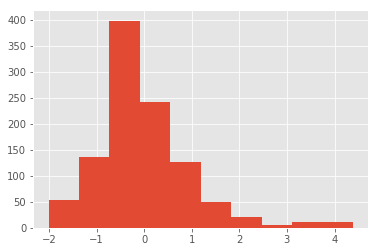

In [18]:
plt.hist(result.resid_pearson)

***간단한 PCA를 해보자.***

In [21]:
df

,country,year,sex,age,suicides_no,population,HDI_for_year,gdp_for_year_($),generation
0,Germany,1990,male,75+ years,1516,1717700,0.801,1.764968e+12,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,0.801,1.764968e+12,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,0.801,1.764968e+12,Silent
3,Germany,1990,female,75+ years,1174,3978800,0.801,1.764968e+12,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,0.801,1.764968e+12,Boomers
...,...,...,...,...,...,...,...,...,...
1051,Republic of Korea,2015,female,35-54 years,1372,8337331,0.907,1.382764e+12,Generation X
1052,Republic of Korea,2015,male,15-24 years,421,3580725,0.907,1.382764e+12,Millenials
1053,Republic of Korea,2015,female,15-24 years,256,3211732,0.907,1.382764e+12,Millenials
1054,Republic of Korea,2015,male,5-14 years,17,2523952,0.907,1.382764e+12,Generation Z


In [20]:
# 몇개의 주성분을 뽑는게 좋을까.
# 스크리 도표를 그려보자.

# X_data = df[['population', 'HDI_for_year', 'gdp_for_year_($)']]
# X_scaled 는 X_data 스케일링 한거.

from sklearn.decomposition import PCA

# 고윳값을 기준으로 설명할 수 있는 분산량 확인.
pca = PCA(random_state=1107)
X_p = pca.fit_transform(X_data)
explainableVar = pd.Series(np.cumsum(pca.explained_variance_ratio_))
explainableVar

0    1.0
1    1.0
2    1.0
dtype: float64

***새 노트북에 적는게 나을듯.***